# Testando inferência no TensorFlow Serving via REST API

Este notebook consome o modelo MNIST servido localmente via TensorFlow Serving REST (Bitnami).

In [1]:
# Importando dependências
import numpy as np
import requests
import json
from tensorflow import keras
import matplotlib.pyplot as plt

## Carregando dados de teste (MNIST)

In [2]:
# Carregar dados de teste
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_test = x_test / 255.0
print(f'Tamanho do x_test: {x_test.shape}')

Tamanho do x_test: (10000, 28, 28)


## Função para inferência via REST API

In [3]:
def predict_mnist_rest(images, url="http://localhost:8501/v1/models/mnist:predict"):
    # images: array shape (N,28,28)
    payload = json.dumps({"instances": images.tolist()})
    response = requests.post(url, data=payload, headers={"content-type": "application/json"})
    result = response.json()
    return np.array(result["predictions"])

## Testando uma única imagem

Predito: 8 | Real: 8


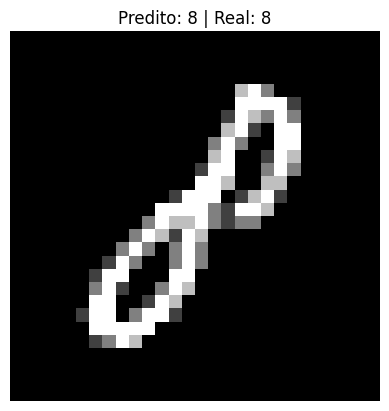

In [4]:
idx = 2093
img = x_test[idx:idx+1]  # shape (1,28,28)
pred = predict_mnist_rest(img)
pred_label = np.argmax(pred[0])
print(f"Predito: {pred_label} | Real: {y_test[idx]}")
plt.imshow(x_test[idx], cmap='gray')
plt.title(f"Predito: {pred_label} | Real: {y_test[idx]}")
plt.axis('off')
plt.show()

## Testando várias imagens (batch prediction)

In [10]:
batch = x_test[44:200]
true_labels = y_test[44:200]
preds = predict_mnist_rest(batch)
pred_labels = np.argmax(preds, axis=1)

print("Labels preditos:", pred_labels)
print("Labels reais   :", true_labels)
acc = np.mean(pred_labels == true_labels)
print(f"Acurácia neste batch: {acc:.2%}")

Labels preditos: [3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 7
 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4
 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2 0 2 9 9 5 5 1
 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8 9 2 5 0 1 1 1
 0 9 0 3 1 6 4 2]
Labels reais   : [3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 7
 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4
 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2 0 2 9 9 5 5 1
 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8 9 2 5 0 1 1 1
 0 9 0 3 1 6 4 2]
Acurácia neste batch: 100.00%


## Visualizando erros (se houver)

In [11]:
erros = np.where(pred_labels != true_labels)[0]
if len(erros) == 0:
    print("Sem erros neste batch!")
else:
    for i in erros:
        plt.imshow(batch[i], cmap='gray')
        plt.title(f"Predito: {pred_labels[i]} | Real: {true_labels[i]}")
        plt.axis('off')
        plt.show()

Sem erros neste batch!
